In [1]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine, text
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [2]:
engine = create_engine("sqlite:///C:\\Users\\WaterDev\\Documents\\GitHub\\portfolio_main\\hockeyviewer\\db_temp\\db2.db")

In [3]:
query_people = 'SELECT * FROM players'
df_people = pd.read_sql_query(sql=text(query_people), con=engine.connect())
df_people["height_feet"] = df_people["height"].str.split("'").str[0].astype(int)
df_people["height_in"] = df_people["height"].str.split(" ").str[-1].str.replace("\"", "").astype(int)
df_people["height_calc"] = df_people["height_feet"]*12 + df_people["height_in"]

In [4]:
query_ppl_stats = 'SELECT * FROM playersTenStats'
df_ppl_stats = pd.read_sql_query(sql=text(query_ppl_stats), con=engine.connect())

In [5]:
df = df_ppl_stats.merge(df_people, left_on='person.id', right_on='id')

In [11]:
# add bmi col
df['bmi'] = (df['weight'].astype(int) / df['height_calc'].astype(int) / df['height_calc'].astype(int))*703
# add ppg col
df['ppg'] = df['stat.points']/df['stat.games']

In [12]:
# keep 20 games or more for season
df_20 = df[df['stat.games'] >= 20]

In [18]:
# setup bins
df_20['bmi_bins'] = pd.qcut(df_20['bmi'], 4)
df_20['height_bins'] = pd.qcut(df_20['height_calc'], 4).astype(str)
df_20['weight_bins'] = pd.qcut(df_20['weight'], 4).astype(str)
df_20['age_bins'] = pd.qcut(df_20['currentAge'], 4).astype(str)

C:\Users\WaterDev\AppData\Local\Temp\ipykernel_4200\1023637721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\WaterDev\AppData\Local\Temp\ipykernel_4200\1023637721.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\WaterDev\AppData\Local\Temp\ipykernel_4200\1023637721.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

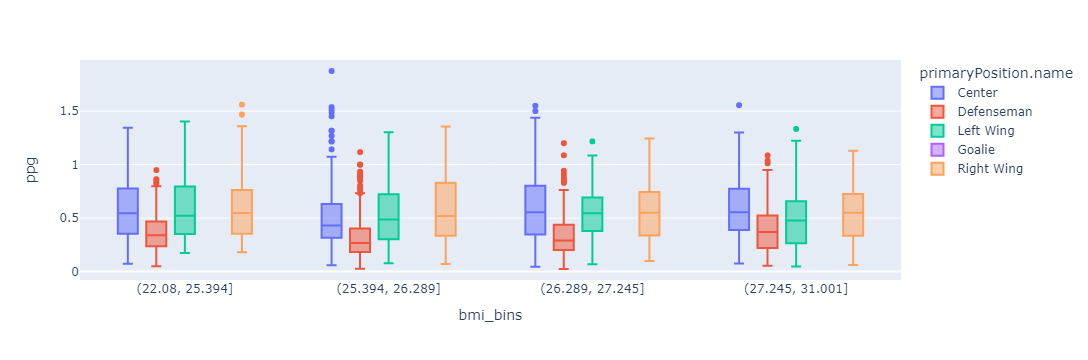

In [21]:
df_20 = df_20.sort_values(by=['bmi_bins'])
px.box(df_20, x='bmi_bins', y='ppg', color='primaryPosition.name')

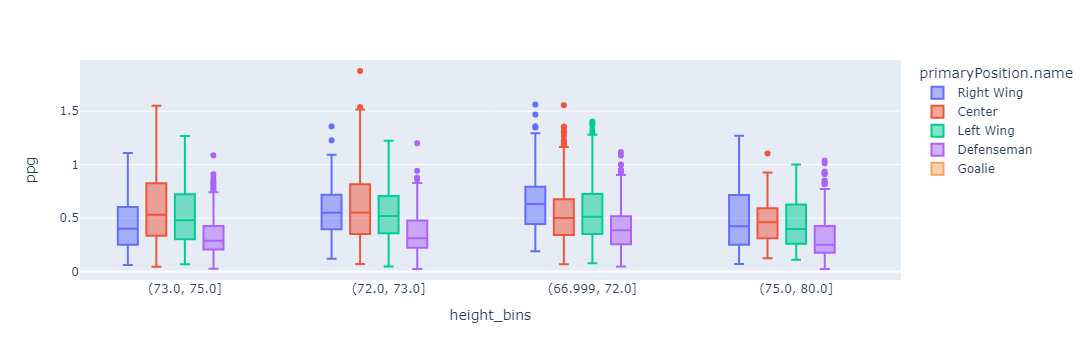

In [15]:
px.box(df_20, x='height_bins', y='ppg', color='primaryPosition.name')

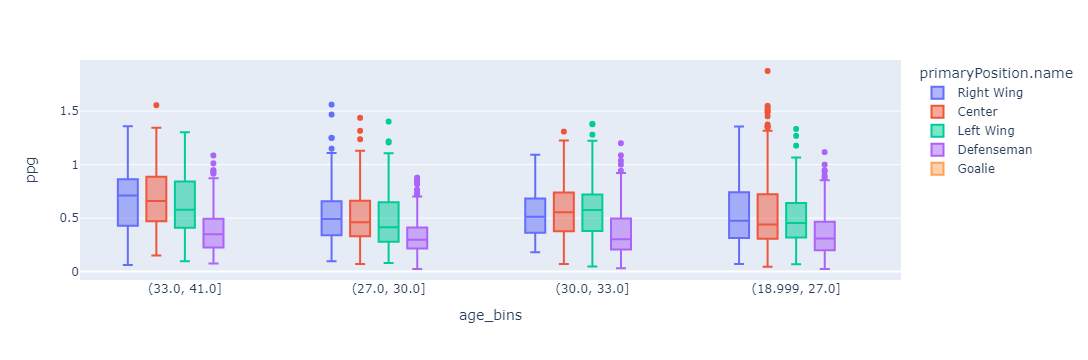

In [16]:
px.box(df_20, x='age_bins', y='ppg', color='primaryPosition.name')

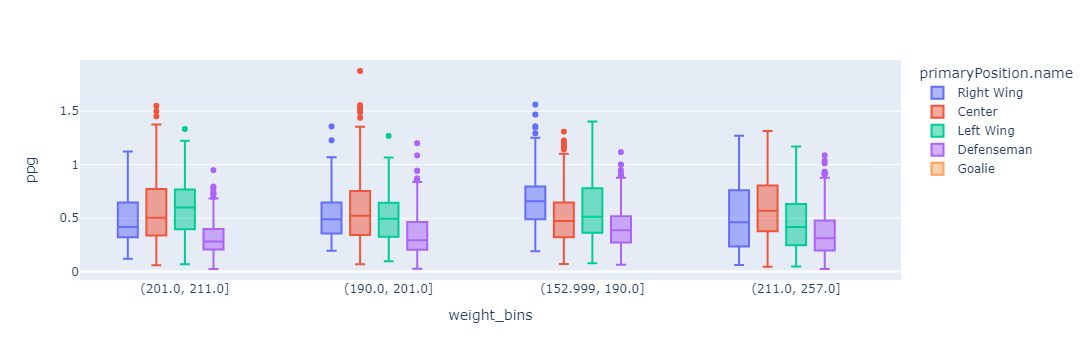

In [17]:
px.box(df_20, x='weight_bins', y='ppg', color='primaryPosition.name')

In [ ]:
# melts bin cols into single col for facet col